# 16_1.Chi-square test(독립성)
- https://www.statsmodels.org/devel/contingency_tables.html

## 1.기본 package 설정

In [ ]:
# 그래프에서 한글 폰트 인식하기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
!pip install pingouin

#  *** 런타임 다시 시작

In [ ]:
# 1.기본
import numpy as np  # numpy 패키지 가져오기
import matplotlib.pyplot as plt # 시각화 패키지 가져오기
import seaborn as sns # 시각화

# 2.데이터 가져오기
import pandas as pd # csv -> dataframe으로 전환

# 3.통계분석 package
import pingouin as pg
from scipy import stats
import statsmodels.api as sm

In [ ]:
# 기본세팅
# 테마 설정
sns.set_theme(style = "darkgrid")

# 한글 인식
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # -인식

## 2.데이터 불러오기

### 2.1 데이터 프레임으로 저장
- 원본데이터(csv)를 dataframe 형태로 가져오기(pandas)

In [ ]:
postch_df = pd.read_csv('https://raw.githubusercontent.com/leecho-bigdata/statistics-python/main/16_1.PostCH.csv', encoding="cp949")
postch_df.head()

,폐암,흡연,관측치
0,1,1,170867
1,1,2,51690
2,1,3,46598
3,1,4,29178
4,1,5,27784


### 2.2 범주형 변수 처리
- 가변수 처리시 문자로 처리를 해야 변수명 구분이 쉬움

In [ ]:
postch_df['폐암'].replace({1:'정상', 2:'폐암'}, inplace=True)
postch_df['흡연'].replace({1:'비흡연', 2:'장기금연', 3:'단기금연', 4:'재흡연', 5:'흡연'}, inplace=True)
postch_df['폐암'] = postch_df['폐암'].astype('category')
postch_df['흡연'] = postch_df['흡연'].astype('category')
postch_df

,폐암,흡연,관측치
0,정상,비흡연,170867
1,정상,장기흡연,51690
2,정상,단기흡연,46598
3,정상,재흡연,29178
4,정상,흡연,27784
5,폐암,비흡연,723
6,폐암,장기흡연,370
7,폐암,단기흡연,497
8,폐암,재흡연,319
9,폐암,흡연,504


### 2.3 자료구조 살펴보기

In [ ]:
postch_df.shape

(10, 3)

In [ ]:
postch_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   폐암      10 non-null     category
 1   흡연      10 non-null     category
 2   관측치     10 non-null     int64   
dtypes: category(2), int64(1)
memory usage: 564.0 bytes


In [ ]:
postch_df.columns

Index(['폐암', '흡연', '관측치'], dtype='object')

## 3.Chi-square test(독립성)

### 3.1 분할표(contingency table)

In [ ]:
tab = pd.crosstab(postch_df['폐암'],
                  postch_df['흡연'],
                  values = postch_df['관측치'],
                  aggfunc = 'sum')

In [ ]:
# 위치 조정
tab = tab.loc[:, ["비흡연", "장기금연", "단기금연", "재흡연", "흡연"]]
tab

흡연,비흡연,장기흡연,단기흡연,재흡연,흡연
폐암,,,,,
정상,170867,51690,46598,29178,27784
폐암,723,370,497,319,504


### 3.2 교차분석

In [ ]:
# ch분석
result = sm.stats.Table(tab)

In [ ]:
# observed
print(result.table_orig)

흡연     비흡연   장기흡연   단기흡연    재흡연     흡연
폐암                                    
정상  170867  51690  46598  29178  27784
폐암     723    370    497    319    504


In [ ]:
# expected
print(result.fittedvalues)

흡연            비흡연          장기흡연          단기흡연          재흡연            흡연
폐암                                                                      
정상  170329.699053  51677.627675  46749.094801  29280.34928  28080.229191
폐암    1260.300947    382.372325    345.905199    216.65072    207.770809


In [ ]:
# Pearson
rslt = result.test_nominal_association()
print(rslt.pvalue)

0.0


### 3.3 표준화잔차

In [ ]:
# 표준화 잔차
result.standardized_resids

흡연,비흡연,장기흡연,단기흡연,재흡연,흡연
폐암,,,,,
정상,21.978698,0.692265,-8.809885,-7.315323,-21.576857
폐암,-21.978698,-0.692265,8.809885,7.315323,21.576857


### 3.4 odds ratio

In [ ]:
tab = tab.loc[:, ["비흡연", "흡연"]]
tab

흡연,비흡연,흡연
폐암,,
정상,170867,27784
폐암,723,504


In [ ]:
table = np.asarray(tab)
table

array([[170867,  27784],
       [   723,    504]])

In [ ]:
t22 = sm.stats.Table2x2(table)

In [ ]:
print(t22.summary())

               Estimate   SE   LCB   UCB  p-value
-------------------------------------------------
Odds ratio        4.287       3.823 4.807   0.000
Log odds ratio    1.456 0.058 1.341 1.570   0.000
Risk ratio        1.460       1.393 1.530   0.000
Log risk ratio    0.378 0.024 0.332 0.425   0.000
-------------------------------------------------


## 4.그래프

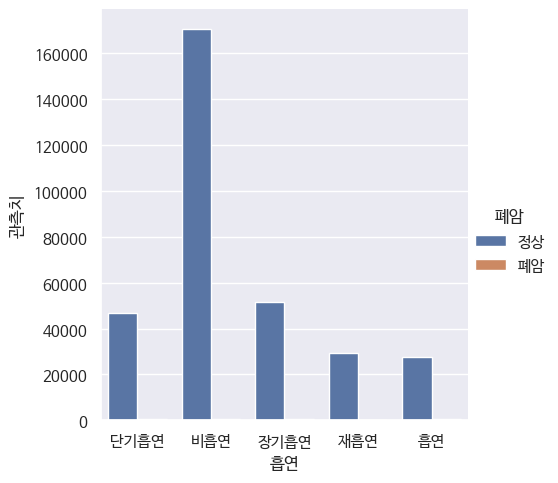

In [ ]:
sns.catplot(x = "흡연",
            y = "관측치",
            hue = "폐암",
            kind = "bar",
            data = postch_df)
plt.show()